<a href="https://colab.research.google.com/github/lydia-r/Data-projects/blob/main/Social%20Buzz/social_buzz_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('https://raw.githubusercontent.com/lydia-r/Data-projects/refs/heads/main/Social%20Buzz/Reactions.csv')

In [24]:
data.head()

,Unnamed: 0,content ID,reaction type,datetime,content type,category,sentiment,score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,photo,studying,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,photo,studying,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,photo,studying,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,photo,studying,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,photo,studying,positive,30


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   content ID     24573 non-null  object
 2   reaction type  24573 non-null  object
 3   datetime       24573 non-null  object
 4   content type   24573 non-null  object
 5   category       24573 non-null  object
 6   sentiment      24573 non-null  object
 7   score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [27]:
category_counts= data['category'].value_counts()
top_categories= category_counts
print("Top 5 most reacted to categories:")
print(top_categories)

Top 5 most reacted to categories:
category
animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: count, dtype: int64


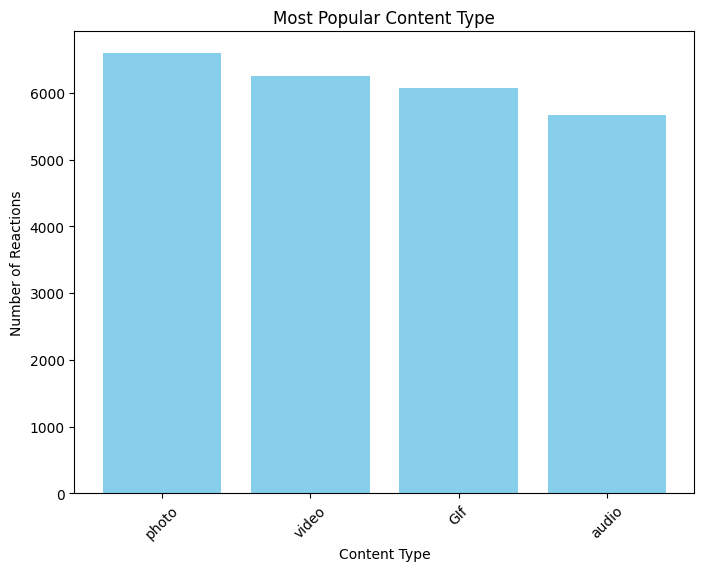

In [29]:
content_type_counts = data['content type'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(content_type_counts.index, content_type_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Content Type')
plt.ylabel('Number of Reactions')
plt.title('Most Popular Content Type')
plt.xticks(rotation=45)

# Show the plot
plt.show()

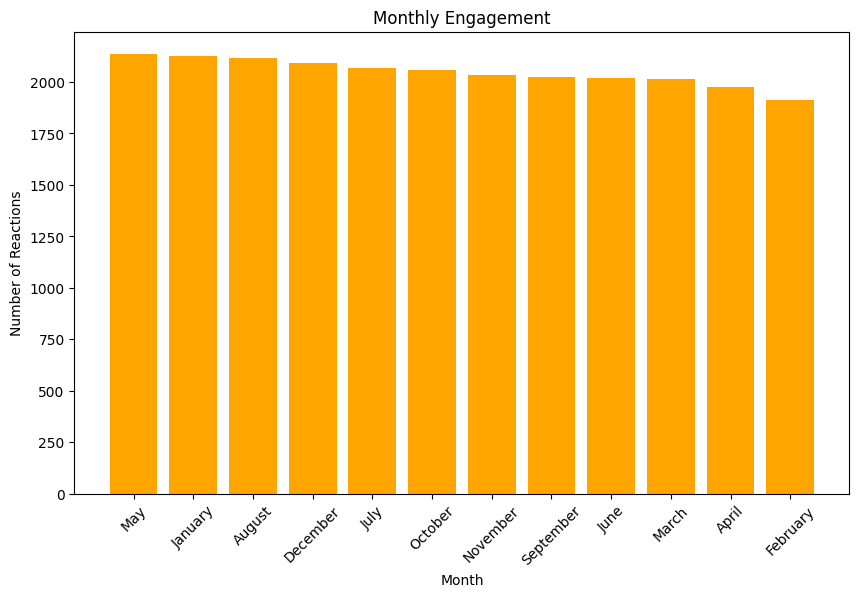

In [30]:
# Convert the 'Datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Extract the month from the 'Datetime' column
data['Month'] = data['datetime'].dt.month_name()

# Get the counts of reactions for each month
monthly_engagement = data['Month'].value_counts()

# Plot the monthly engagement
plt.figure(figsize=(10,6))
plt.bar(monthly_engagement.index, monthly_engagement.values, color='orange')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Reactions')
plt.title('Monthly Engagement')

# Show the plot
plt.xticks(rotation=45)
plt.show()

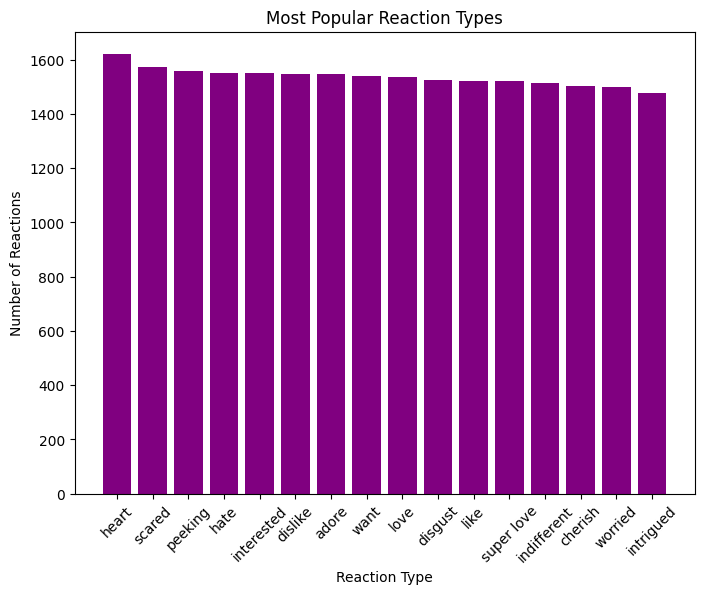

In [31]:
# Get the counts of each reaction type
reaction_type_counts = data['reaction type'].value_counts()

# Plot the most popular reaction types
plt.figure(figsize=(8,6))
plt.bar(reaction_type_counts.index, reaction_type_counts.values, color='purple')

# Add labels and title
plt.xlabel('Reaction Type')
plt.ylabel('Number of Reactions')
plt.title('Most Popular Reaction Types')
plt.xticks(rotation=45)
plt.show()

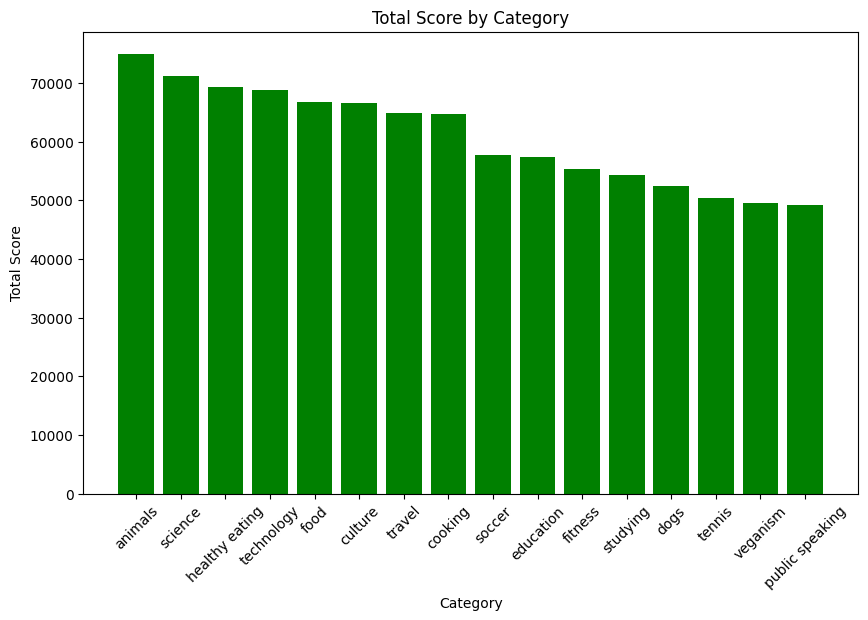

In [39]:
category_score = data.groupby('category')['score'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(category_score.index, category_score.values, color='green')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.title('Total Score by Category')

# Show the plot
plt.xticks(rotation=45)
plt.show()

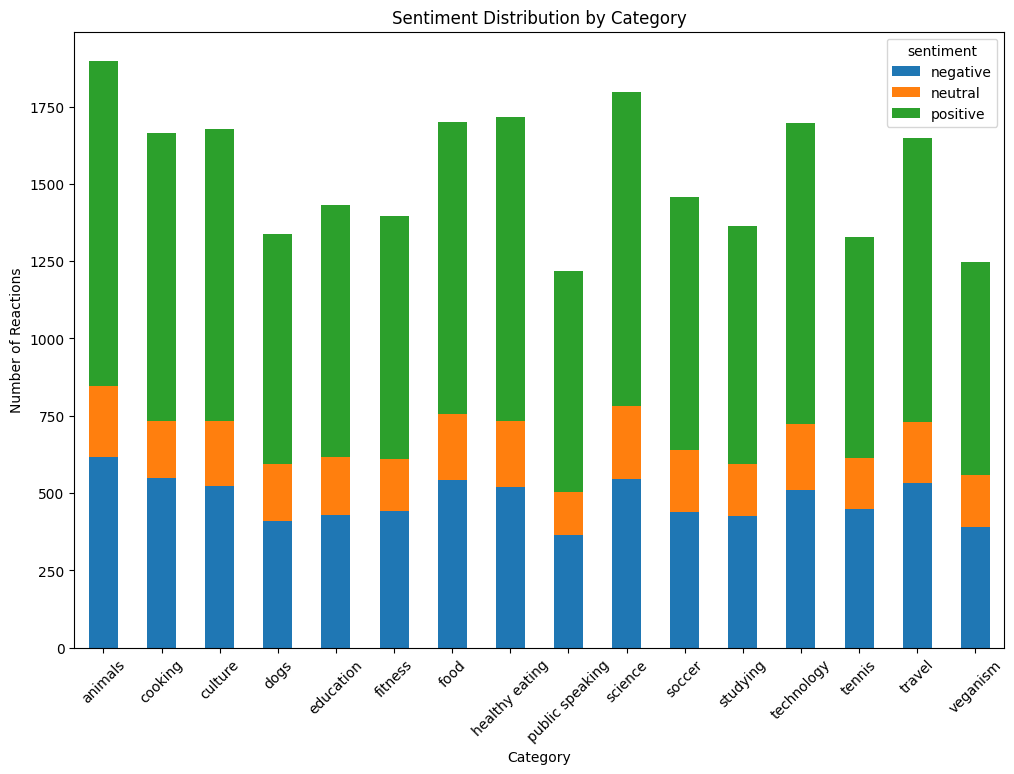

In [41]:
# Remove any leading or trailing spaces from the column names
data.columns = data.columns.str.strip()

# Group the data by 'Category' and 'Sentiment' to count occurrences
sentiment_by_category = data.groupby(['category', 'sentiment'])['sentiment'].count().unstack()

# Plot the stacked bar chart for sentiment distribution across categories
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12,8))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.title('Sentiment Distribution by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

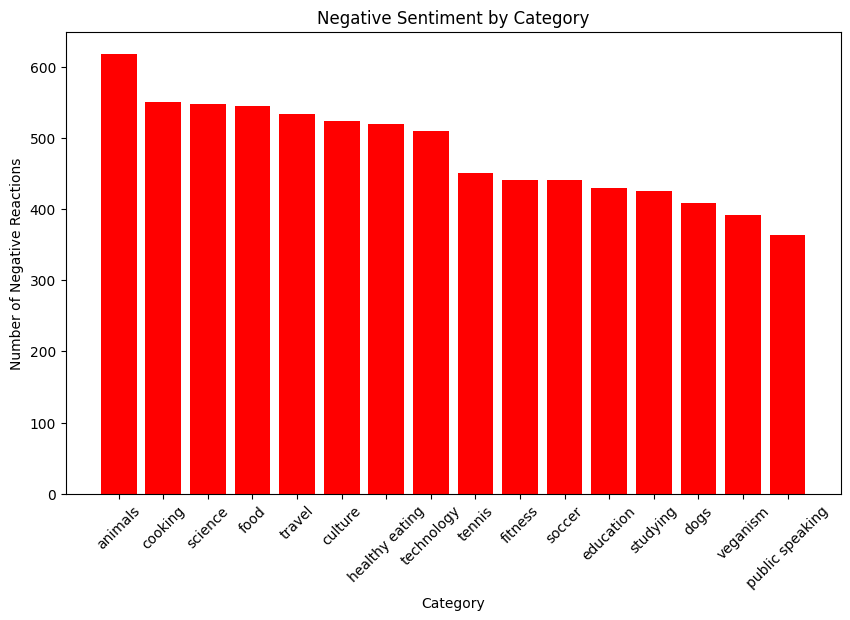

In [43]:
# Correcting column name by removing extra spaces
data.columns = data.columns.str.strip()

# Filter for negative sentiments (assuming 'negative' label in the 'Sentiment' column)
negative_sentiment = data[data['sentiment'] == 'negative']

# Group by 'Category' and count the number of negative sentiments for each category
negative_sentiment_by_category = negative_sentiment['category'].value_counts()

# Plot the negative sentiments by category
plt.figure(figsize=(10,6))
plt.bar(negative_sentiment_by_category.index, negative_sentiment_by_category.values, color='red')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Negative Reactions')
plt.title('Negative Sentiment by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


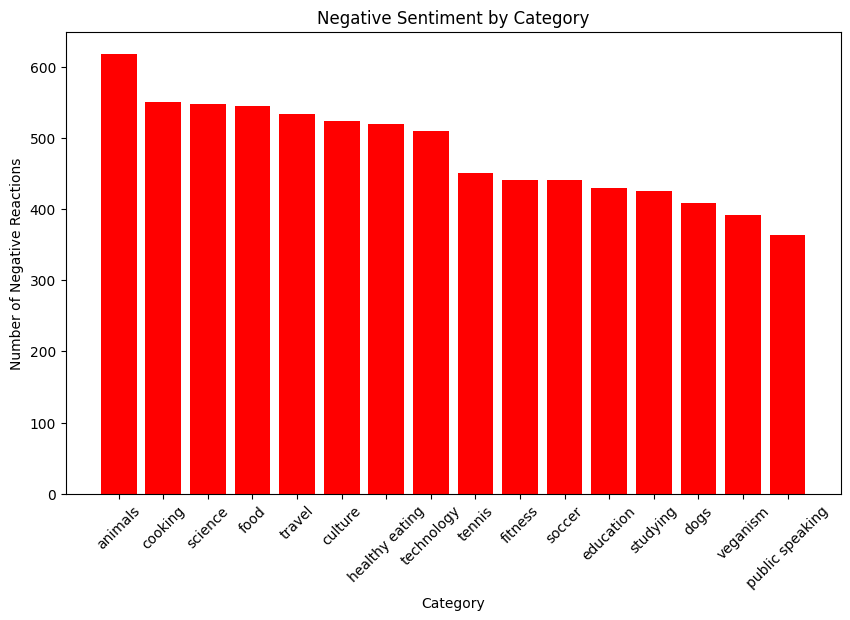

In [44]:
# Correcting column name by removing extra spaces
data.columns = data.columns.str.strip()

# Filter for negative sentiments (assuming 'negative' label in the 'Sentiment' column)
negative_sentiment = data[data['sentiment'] == 'negative']

# Group by 'Category' and count the number of negative sentiments for each category
negative_sentiment_by_category = negative_sentiment['category'].value_counts()

# Plot the negative sentiments by category
plt.figure(figsize=(10,6))
plt.bar(negative_sentiment_by_category.index, negative_sentiment_by_category.values, color='red')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Negative Reactions')
plt.title('Negative Sentiment by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load the dataset again
file_path = '/mnt/data/Reactions.csv'
reactions_df = pd.read_csv(file_path)

# Step 1: Data Preparation
# Remove any leading or trailing spaces from column names
reactions_df.columns = reactions_df.columns.str.strip()

# Drop rows with missing sentiment values
data = reactions_df.dropna(subset=['Sentiment'])

# Convert the categorical columns into numeric features using one-hot encoding
X = pd.get_dummies(data[['Category', 'Content Type', 'Reaction Type']])

# Convert the sentiment column into binary values (1 for positive, 0 for negative)
y = np.where(data['Sentiment'] == 'positive', 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Creation
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(16, activation='relu'),  # Another hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Model Training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 4: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc